# **MÓDULO 18 - AULA 2**
# Regressão Linear Simples com Python

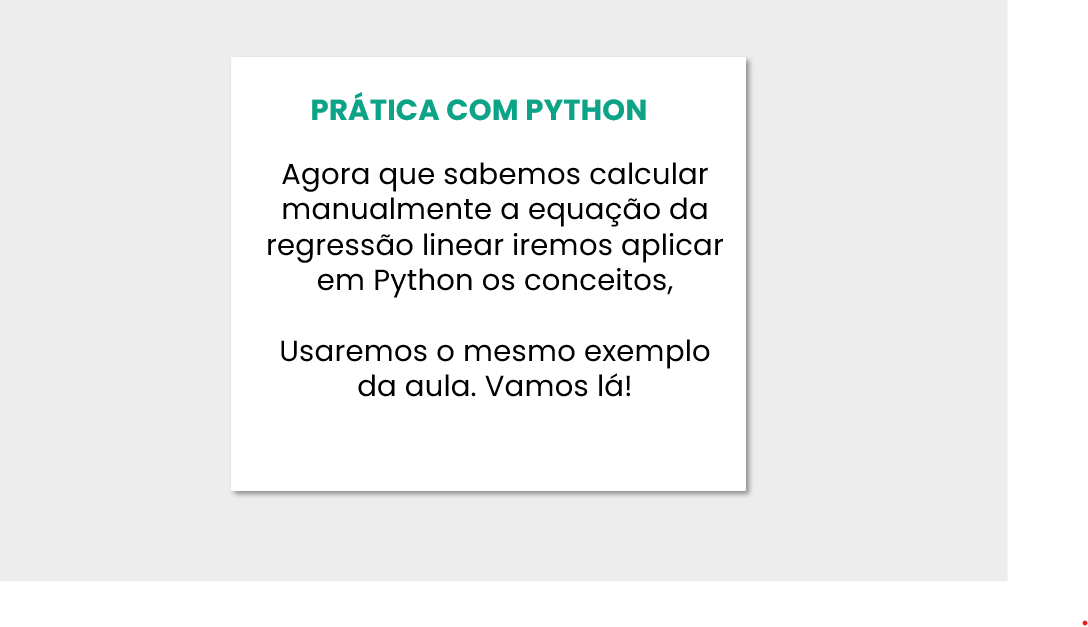

In [1]:
import pandas as pd

In [2]:
# Dados de investimento em publicidade e acessos no site
dados = {
    'Investimento_Publicidade': [100, 140, 150, 390, 350, 155, 200],
    'Acessos_Site': [200, 260, 300, 760, 700, 320, 400]
}

df = pd.DataFrame(dados)

- Primeiro de tudo, se estivesse lidando com uma base extensa no dia dia, teríamos que aplicar todos os passos que vimos nós módulos passados de pré proceessamento dos dados. Mas por ser uma aula amostral e termos criado na mão o dataframe, não precisaremos dessas verificações.

**1. Calculando a correlação:**

Agora, antes de iniciarmos tentando encontrar a reta, podemos calcular a correlação entre o investimento e os acessos do site.
Se tivermos uma correlação forte saberemos que a chance de encontrarmos uma reta que se adeque aos dados é grande.

In [3]:
df['Investimento_Publicidade'].corr(df['Acessos_Site'])

#Uma correlação de 0.99 indica uma forte correlação positiva entre as duas variáveis, o que significa que elas tendem a aumentar juntas.

0.9988447309774267

Portanto, com uma correlação de 0.99, podemos dizer que 99% da variação em uma variável está associada à variação na outra variável, mas isso não implica necessariamente uma relação de causa e efeito entre elas.

**2 - Regressão Linear Simples com Scikit-Learn**

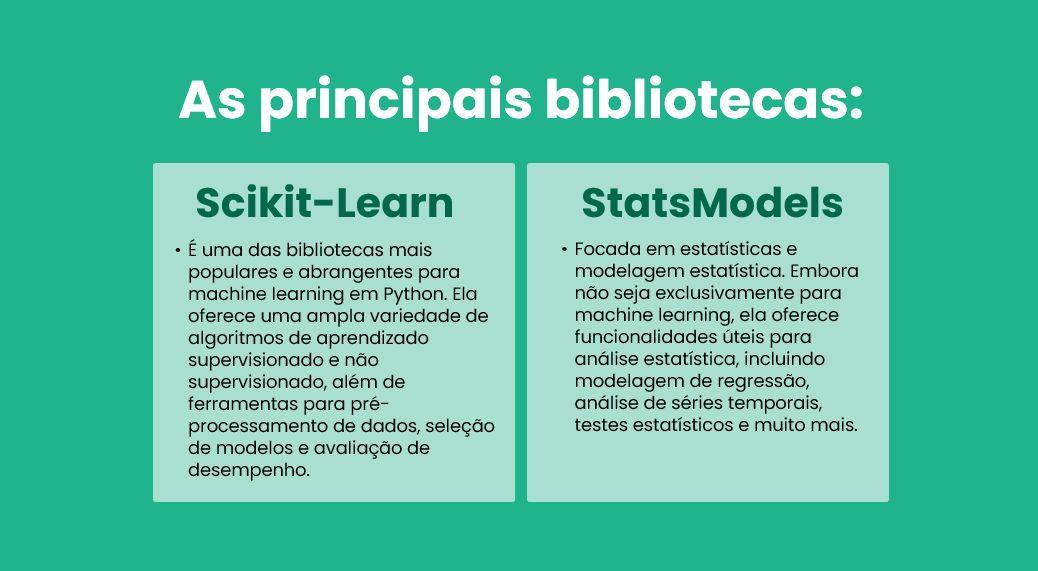

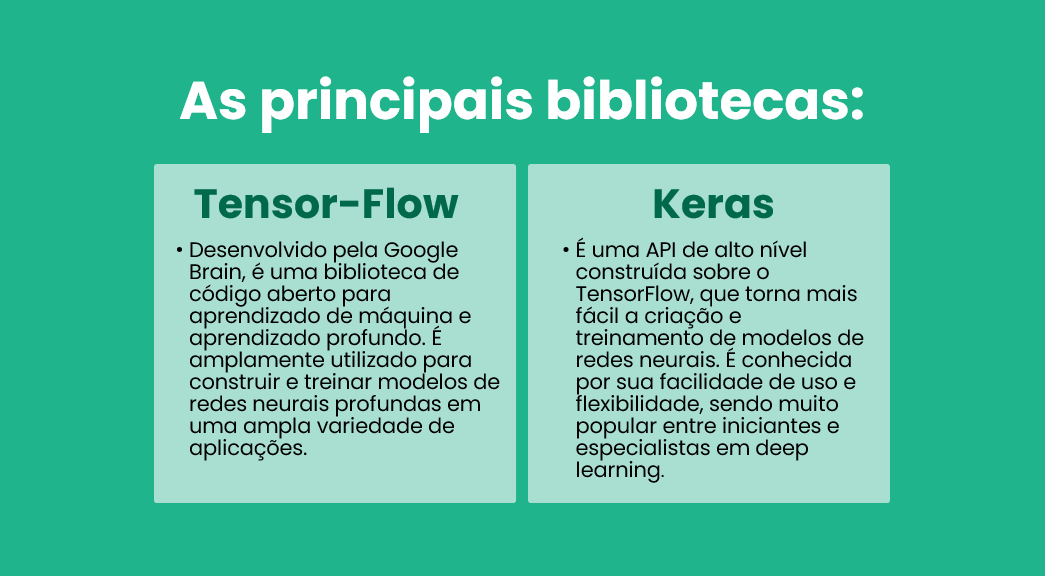

In [4]:
from sklearn.linear_model import LinearRegression

**PASSO 1)** Separar nossa variável dependente da independente:
Quem será X e Y.

In [5]:
# Separar a variável independente da variável dependente
X = df[['Investimento_Publicidade']]  # Variável independente (características)
y = df['Acessos_Site']  # Variável dependente (rótulo)

Separamos Y como dependente pois sempre vamos querer saber através do investimento mensal qual será o número de acessos no site.

In [6]:
X

,Investimento_Publicidade
0,100
1,140
2,150
3,390
4,350
5,155
6,200


**PASSO 2:** Criar nosso modelo de regressão.

In [7]:
# Esta linha cria um objeto do tipo LinearRegression(), que será usado para representar nosso modelo de regressão linear.
regressao_acessos_site = LinearRegression()

regressao_acessos_site.fit(X,y)
# O modelo aprende a relação entre as variáveis independentes (X) e a variável dependente (y).
# Após a execução desta linha, o modelo estará pronto para fazer previsões.

LinearRegression()

In [8]:
#O regressao_acessos_site.intercept_ é um atributo do objeto de regressão linear que representa o coeficiente linear da equação
regressao_acessos_site.intercept_

3.2414834387091105

In [9]:
# O regressao_acessos_site.coef_ é um atributo do objeto de regressão linear que representa os coeficientes das variáveis independentes na equação de regressão.
regressao_acessos_site.coef_

array([1.96451826])

Nossa equação seria:  **ACESSOS_SITE** = 3.2*(INVESTIMENTO) + 1.96

# **MÓDULO 18 - AULA 3**
# Regressão Linear Simples com Python - Avaliando o modelo

**Passo 3:** Avaliação do Desempenho do Modelo

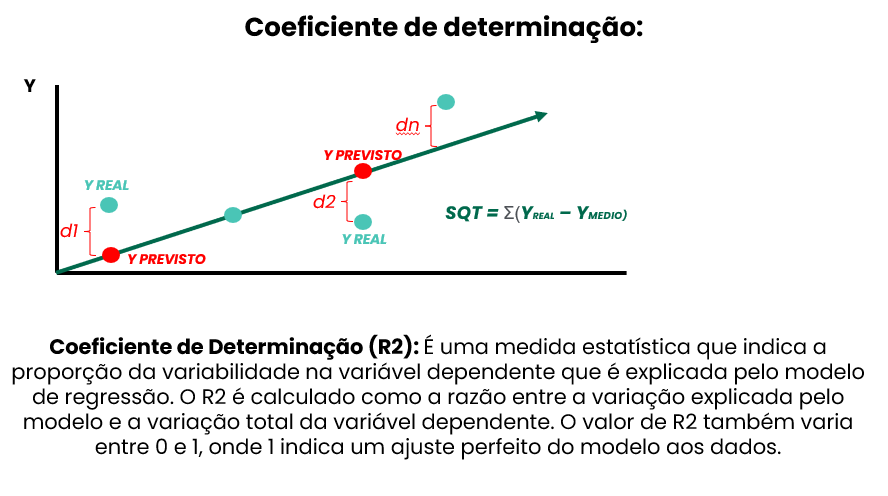

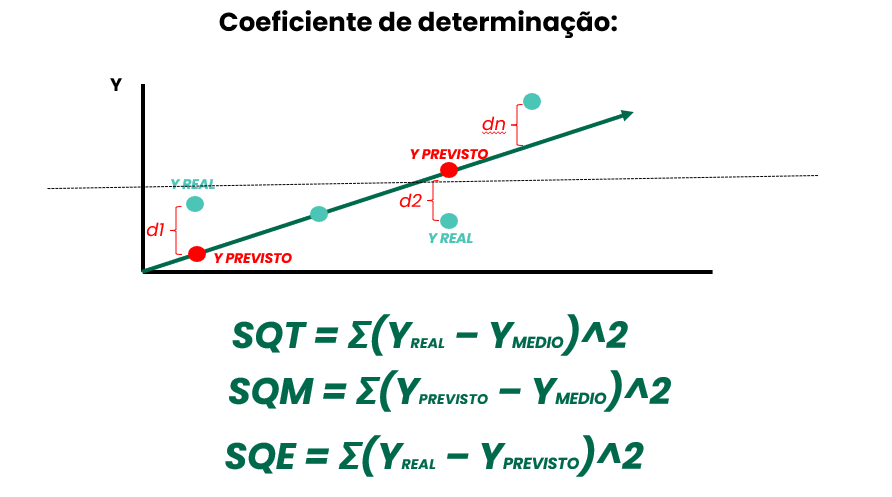

<p>SQT = SOMA DOS QUADRADOS TOTAIS</p>
<p>SQM = SOMA DOS QUADRADOS DO MODELO</p>
<p>SQE = SOMA DO QUADRADOS DOS ERROS (RESÍDUO)</p>

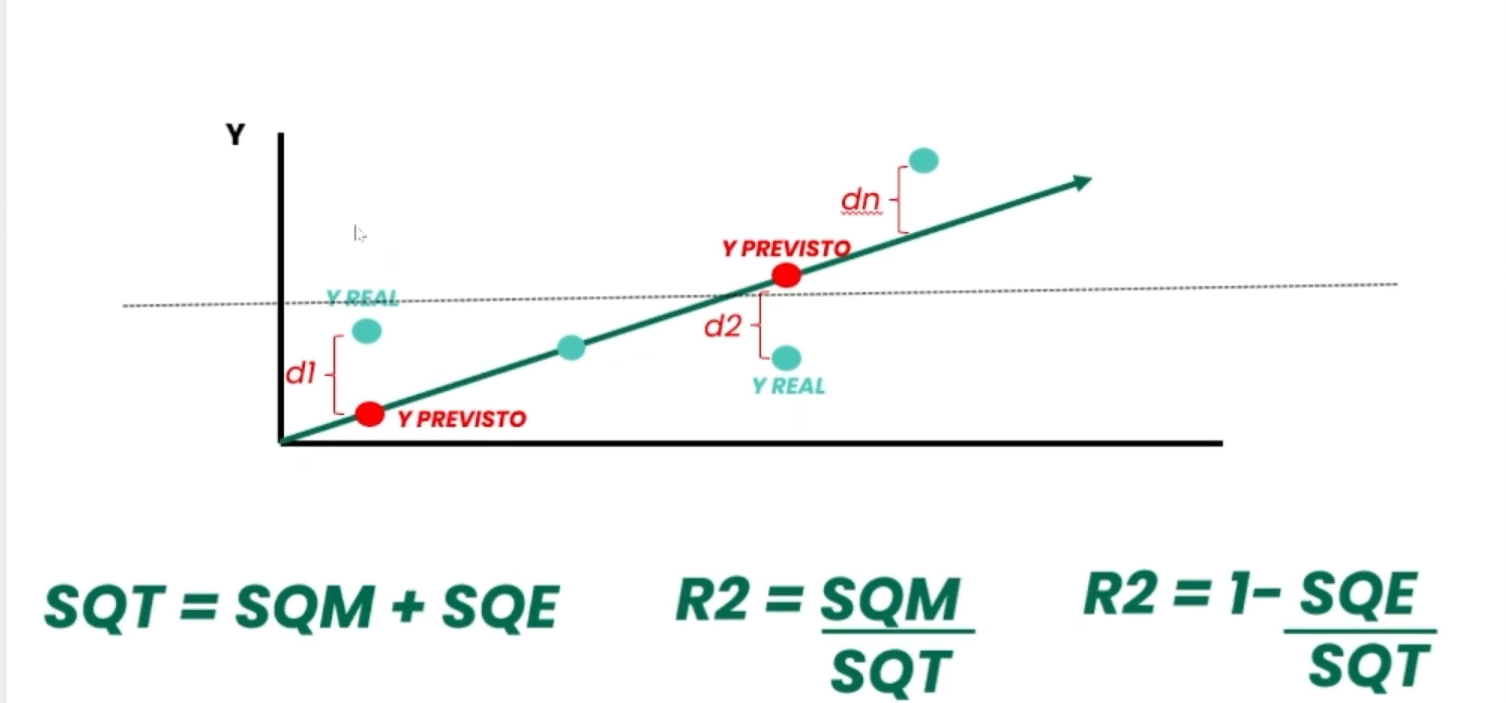

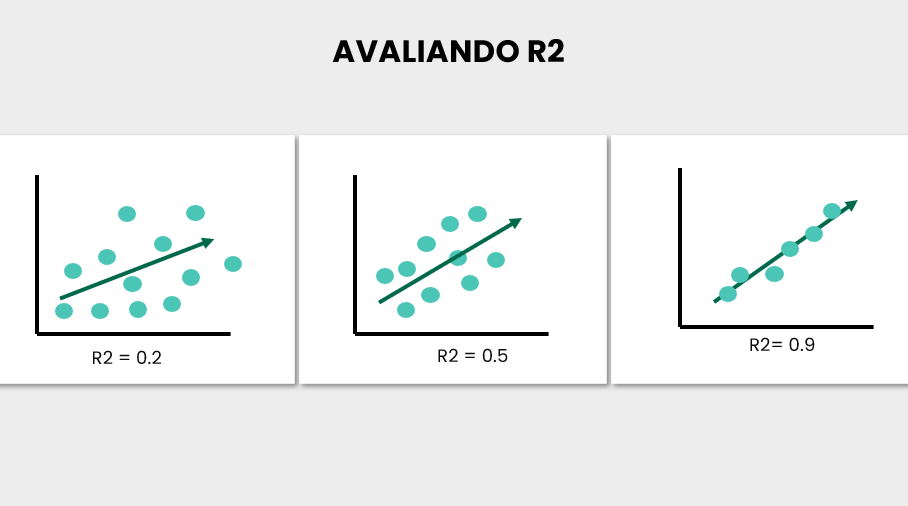

In [10]:
regressao_acessos_site.score(X,y)

0.9976907966013683

Um coeficiente de determinação R2 de 0.997 indica que aproximadamente 99.7% da variação na variável dependente é explicada pelas variáveis independentes incluídas no modelo de regressão.
Em outras palavras, isso significa que o modelo de regressão é altamente capaz de prever a variabilidade nos valores da variável dependente com base nas variáveis independentes. É um indicador muito forte de que o modelo se ajusta bem aos dados.

**PASSO 4:** Plotando nosso gráfico da reta de regressão.


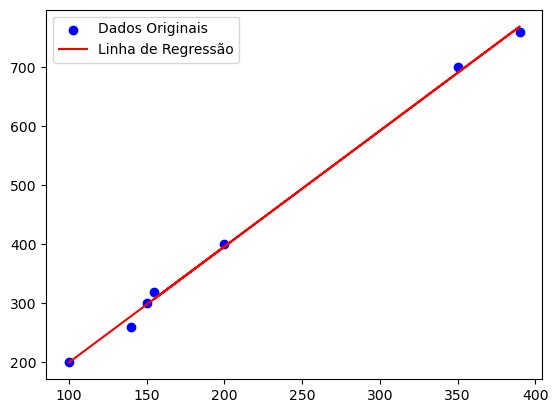

In [11]:
import matplotlib.pyplot as plt

# Plotar os dados originais
plt.scatter(X, y, color='blue', label='Dados Originais')

# Plotar a linha de regressão
plt.plot(X, regressao_acessos_site.predict(X), color='red', label='Linha de Regressão')
plt.legend()
plt.show()

Conseguimos retirar do nosso gráfico que os pontos parecem se ajuster muito bem a reta, justificando o valor elevado do R quadrado. Vemos que pelo menos 3 dos nossos pontos cruzam a reta e os demais estão bem próximos.

**Passo 5:** Realizando Previsões.

Agora que avaliamos podemos tentar realizar uma previsão para um valor novo de investimento!

In [12]:
previsoes = regressao_acessos_site.predict(X)
previsoes

array([199.69330943, 278.27403982, 297.91922242, 769.40360479,
       690.8228744 , 307.74181372, 396.14513542])

Aqui conseguimos visualizar todos os valores preditos e podemos comparar eles com os valores reais.

In [13]:
y

0    200
1    260
2    300
3    760
4    700
5    320
6    400
Name: Acessos_Site, dtype: int64

Vamos determinar um valor para que seja feita a nova previsão:

Então imagine que estamos em um mês de aniversário do nosso ecommerce e queriamos uma previsão caso façamos um investimento mais agressivo de 500 reais em publicidade, vamos mensurar os acessos no site.

In [14]:
investimento = [[500]]
previsao_acessos = regressao_acessos_site.predict(investimento)
print("Previsão de acessos no site com investimento de 500 em publicidade:", previsao_acessos)

Previsão de acessos no site com investimento de 500 em publicidade: [985.50061338]


c:\Users\emers\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Esse aviso (UserWarning) significa que o conjunto de dados de entrada (X) não possui nomes de características válidos associados a ele. No entanto, o modelo de regressão linear foi ajustado usando nomes de características.

Em scikit-learn, é comum que os modelos de regressão linear aceitem nomes de características ao ajustar o modelo, o que pode ser útil para identificar quais características estão sendo usadas no modelo. No entanto, este aviso indica que os nomes de características não estão presentes no conjunto de dados que está sendo usado para fazer previsões.

# **MÓDULO 12 - AULA 4**
# Regressão Linear Múltipla

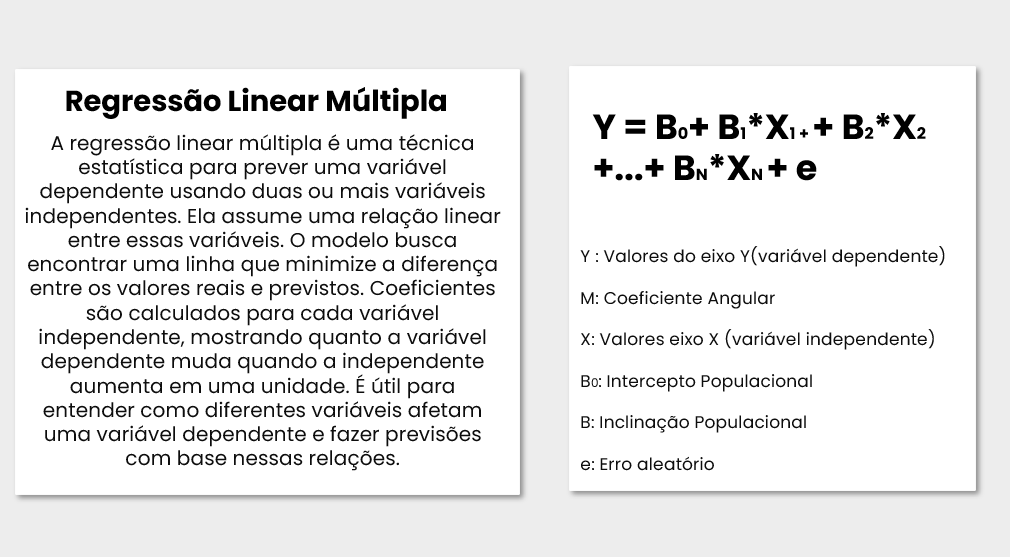

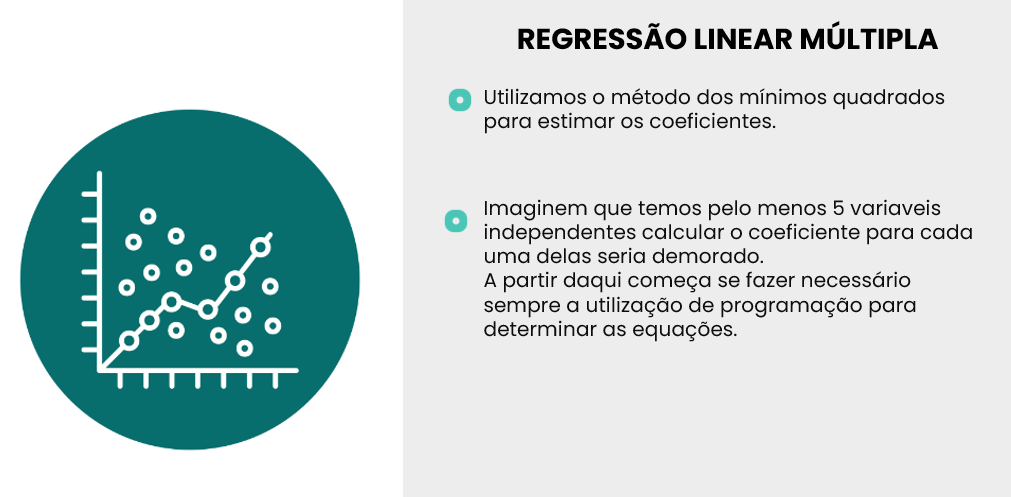

In [15]:
dados = {
    'Investimento_Publicidade': [100, 140, 160, 390, 380, 245, 250, 140, 360],
    'Impressao_Publicidade': [2050, 2500, 3350, 7500, 7120, 3650, 1985, 2150, 2100],
    'Alcance_Publicidade': [1500, 2350, 2950, 7200, 6885, 2050, 1185, 1930, 1985 ],
    'Curtidas_Publicidade': [200, 20, 100, 120, 125, 125, 90, 50, 55 ],
    'Comentarios_Publicidade': [50, 15, 10, 45, 56, 60, 2, 15, 32],
    'Acessos_Site': [200, 260, 320, 780, 700, 340, 425, 180, 200]
}

df = pd.DataFrame(dados)

**Conheça mais sobre os termos do marketing:**
O **alcance** se refere ao número total de indivíduos ou audiência únicos que foram expostos a um determinado anúncio durante um período de tempo específico. Em outras palavras, é a medida da extensão da campanha publicitária e quantas pessoas foram alcançadas por ela.

A **impressão** do anúncio se refere ao número de vezes que o anúncio é exibido para o público-alvo. Em termos de publicidade online, uma impressão ocorre toda vez que um anúncio é visualizado em uma página da web, aplicativo móvel, vídeo, etc., independentemente de ser clicado ou não.


**Passo 1**: Matriz de Correlação

Assim como realizamos na regressão linear simples, iremos começar verificando a correlação entre as variáveis independetes e a dependente.

Verificar a correlação entre as variáveis independentes e a variável dependente antes de aplicar um modelo de regressão linear múltipla tem várias vantagens:

Identificar Relações Lineares: A correlação pode ajudar a identificar se existe uma relação linear entre as variáveis independentes e a variável dependente. Se a correlação for alta, isso sugere uma relação linear forte e pode indicar que as variáveis são boas candidatas para serem incluídas no modelo de regressão linear.

Seleção de Características: A correlação pode ajudar na seleção de características, ou seja, escolher quais variáveis independentes incluir no modelo.

Evitar Multicolinearidade: A correlação pode ajudar a identificar multicolinearidade entre as variáveis independentes, o que ocorre quando duas ou mais variáveis independentes estão altamente correlacionadas entre si. A multicolinearidade pode distorcer os coeficientes estimados do modelo e tornar as interpretações menos confiáveis.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

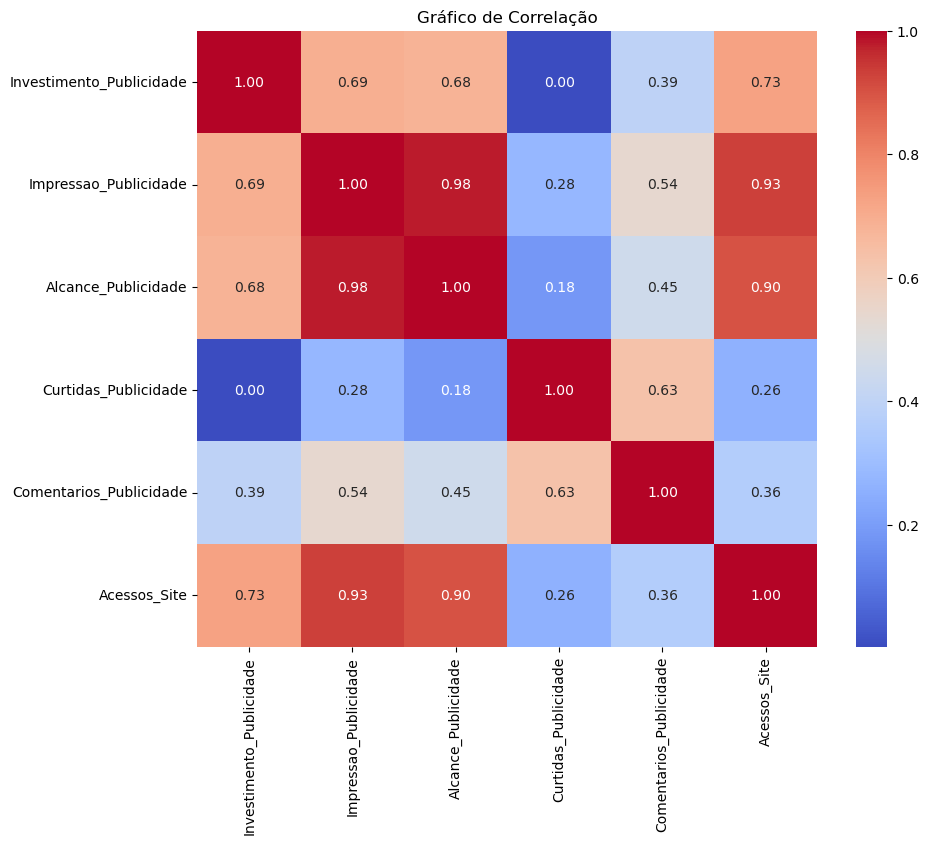

In [17]:
df = pd.DataFrame(dados)

# Calculando a matriz de correlação
correlacao = df.corr()

# Gráfico:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Gráfico de Correlação')
plt.show()

Notamos que a correlação para a grande maioria das variáveis independentes com a variável de acessos ao site é bem grande.
Entretanto a variável de curtidas e comentários parece ter uma correlação mais baixa.

**PASSO 2:** Separando variável dependente de independentes.

In [18]:
# Separar a variáveis independentes da variável dependente
X = df[['Investimento_Publicidade', 'Impressao_Publicidade', 'Alcance_Publicidade','Curtidas_Publicidade','Comentarios_Publicidade']] # Variável independente (características)
y = df['Acessos_Site']  # Variável dependente (rótulo)

**PASSO 3:** Regressão Linear Múltipla

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressao_multipla = LinearRegression()
regressao_multipla.fit(X,y)

LinearRegression()

In [21]:
regressao_multipla.intercept_

-64.94928139143934

In [22]:
regressao_multipla.coef_

array([ 0.49994145,  0.15807149, -0.06342447,  0.88733161, -4.28884168])

Esses coeficientes indicam o impacto relativo de cada variável independente na variável dependente, assumindo que todas as outras variáveis permaneçam constantes. Coeficientes positivos indicam uma relação positiva (aumento em uma variável está associado a um aumento na variável dependente), enquanto coeficientes negativos indicam uma relação negativa.
Em geral, um coeficiente maior em magnitude indica uma maior influência da variável independente na variável dependente, todas as outras variáveis sendo mantidas constantes.

**PASSO 4:** Avaliação do Modelo

In [23]:
regressao_multipla.score(X,y)

0.9594366953873272

Sempre que estivermos na etapa de avaliação do modelo devemos ir além de apenas plotar os valores. Precisamos trazer nem que seja breve, um insight.
Um coeficiente de determinação r quadrado de 0.95 indica que aproximadamente 95% da variação na variável dependente é explicada pelas variáveis independentes incluídas no modelo de regressão linear.Isso é geralmente considerado um resultado muito bom e sugere que o modelo se ajusta excepcionalmente bem aos dados.

No caso da regressão linear múltipla, onde temos mais de uma variavel independente como forma de avaliação podemos ir além do r quadrado e avaliar quais são nossas features (variáveis independentes) de maior valor.

**Exemplo 1:**
Vamos rodar nosso modelo apenas com as variáveis de menor correlação:

In [24]:
X = df[['Curtidas_Publicidade','Comentarios_Publicidade']] # Variável independente (características)
y = df['Acessos_Site']  # Variável dependente (rótulo)

In [25]:
regressao_exemplo1 = LinearRegression()
regressao_exemplo1.fit(X,y)

LinearRegression()

In [26]:
regressao_exemplo1.score(X,y)

0.1322543321976144

Vemos que se nosso modelo fosse regido apenas por essas variáveis a avaliação seria bem baixa.

**Exemplo 2:**
Vamos rodar nosso modelo apenas com as variáveis de MAIOR correlação:

In [27]:
X = df[['Investimento_Publicidade', 'Impressao_Publicidade', 'Alcance_Publicidade']] # Variável independente (características)
y = df['Acessos_Site']  # Variável dependente (rótulo)

In [28]:
regressao_exemplo2 = LinearRegression()
regressao_exemplo2.fit(X,y)

LinearRegression()

In [29]:
regressao_exemplo2.score(X,y)

0.8869418276783738

Nós entendemos que para o exemplo dado, mesmo que tenhamos variáveis com menor correlação, elas contribuiem para um modelo com maior R quadrado. Isso se dá pois:

* Mesmo que essas variáveis tenham uma baixa correlação linear com a variável dependente, elas podem contribuir de forma não linear para a previsão.
* As variáveis com baixa correlação podem fornecer informações únicas que não são capturadas pelas variáveis altamente correlacionadas.
* Variáveis com baixa correlação podem adicionar algum "ruído" aos dados, mas esse ruído pode ser útil para prever a variável dependente em certos casos.

Ou seja, cada caso é um caso e necessita ser analisado.

# **MÓDULO 18 - AULA 5**
# Regressão Linear Múltipla com a Biblioteca Stats Models

**Stats Model:**
Para finalizar nosso modulo de regressão, vamos utilizar a biblioteca Stats Model para fazer o mesmo processo da modelagem.
A vantagem nesse caso é que ao rodar nosso modelo essa biblioteca nós traz mais métricas estatísticas que nos ajudam a interpretar os resultados.

Usaremos os mesmos dados da aula passada.

In [30]:
dados = {
    'Investimento_Publicidade': [100, 140, 160, 390, 380, 245, 250, 140, 360],
    'Impressao_Publicidade': [2050, 2500, 3350, 7500, 7120, 3650, 1985, 2150, 2100],
    'Alcance_Publicidade': [1500, 2350, 2950, 7200, 6885, 2050, 1185, 1930, 1985 ],
    'Curtidas_Publicidade': [200, 20, 100, 120, 125, 125, 90, 50, 55 ],
    'Comentarios_Publicidade': [50, 15, 10, 45, 56, 60, 2, 15, 32],
    'Acessos_Site': [200, 260, 320, 780, 700, 340, 425, 180, 200]
}

df = pd.DataFrame(dados)

In [31]:
# Separar a variáveis independentes da variável dependente
X = df[['Investimento_Publicidade', 'Impressao_Publicidade', 'Alcance_Publicidade','Curtidas_Publicidade','Comentarios_Publicidade']] # Variável independente (características)
y = df['Acessos_Site']  # Variável dependente (rótulo)

In [32]:
import statsmodels.api as sm

In [33]:
# Adicionando uma constante ao conjunto de dados para estimar o termo de interceptação
X = sm.add_constant(X)

# Criando o modelo de regressão linear múltipla --- (Ordinary Least Squares, Minimos Quadrados Ordinários)
modelo_stats = sm.OLS(y, X)

# Ajustando o modelo aos dados
resultado_stats = modelo_stats.fit()

# Exibir os resultados da regressão
print(resultado_stats.summary())

                            OLS Regression Results                            
Dep. Variable:           Acessos_Site   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     14.19
Date:                Fri, 03 Jan 2025   Prob (F-statistic):             0.0267
Time:                        17:15:12   Log-Likelihood:                -46.380
No. Observations:                   9   AIC:                             104.8
Df Residuals:                       3   BIC:                             105.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

c:\Users\emers\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


Notem que esse formato de visulização nos traz diversas métricas, algumas delas nos aprofundaremos mais a frente durante o curso mas já podemos retirar novos insights.

* Adj. R-squared: (R quadrado ajustado) versão ajustada do coeficiente de determinação r2que leva em consideração o número de variáveis independentes no modelo. Enquanto o r2 comum mede a proporção de variabilidade na variável dependente explicada pelas variáveis independentes no modelo, o r2 ajustado penaliza o r2 por cada variável independente adicionada ao modelo, levando em conta o grau de liberdade.

* Prob (F-statistic): É a probabilidade associada ao valor da estatística F do teste de significância global do modelo. No contexto da regressão linear, o teste F é usado para determinar se pelo menos uma das variáveis independentes no modelo tem um efeito estatisticamente significativo na variável dependente.Em geral, se o valor Prob (F-statistic) for menor que um nível de significância escolhido (por exemplo, 0.05), podemos rejeitar a hipótese nula e concluir que pelo menos uma das variáveis independentes tem um efeito significativo na variável dependente.


In [36]:
# Separar a variáveis independentes da variável dependente
X_1 = df[['Investimento_Publicidade', 'Impressao_Publicidade', 'Alcance_Publicidade']] # Variável independente (características)
y_1 = df['Acessos_Site']  # Variável dependente (rótulo)

In [37]:
X_1 = sm.add_constant(X_1)
modelo_stats_ex1 = sm.OLS(y_1, X_1)
resultado_stats_ex1 = modelo_stats_ex1.fit()
print(resultado_stats_ex1.summary())

                            OLS Regression Results                            
Dep. Variable:           Acessos_Site   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     13.08
Date:                Fri, 03 Jan 2025   Prob (F-statistic):            0.00839
Time:                        17:15:44   Log-Likelihood:                -50.992
No. Observations:                   9   AIC:                             110.0
Df Residuals:                       5   BIC:                             110.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

c:\Users\emers\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


Notamos que apesar da queda do R2, temos um aumento no Prob (F-statistic) que demonstra que as variáveis parecem ter um efeito estatístico maior na variável independente.